In [143]:
%matplotlib osx

import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import functions as fun
import geoms
from scipy.spatial import distance

import scipy.optimize as opt
from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist
from scipy.optimize import least_squares
from sklearn.linear_model import RANSACRegressor
import sys
sys.path.append('/Users/ehealy/Chicago/Simons_II/photopol/hex_analysis')
import hexa
plt.ion()
import importlib 
importlib.reload(fun)
importlib.reload(geoms)
importlib.reload(hexa)

<module 'hexa' from '/Users/ehealy/Chicago/Simons_II/photopol/hex_analysis/hexa.py'>

In [6]:
ply_file = "data/plumbbobv2_maya/point_cloud/Dense_point_cloud 1.ply" # maya's feb 2025 photos
obj_file = "data/plumbbobv2_maya/textured_mesh/Textured_mesh_1.obj"
mtl_file = "data/plumbbobv2_maya/textured_mesh/Textured_mesh_1.mtl"  # Ensure the .mtl file is correctly referenced
jpeg_file = "data/plumbbobv2_maya/textured_mesh/Textured_mesh_1_tex0.jpg"  # The first texture file, but Open3D will handle multiple


In [145]:


ply_file = "/Users/ehealy/Chicago/Simons_II/photopol/data/plumbbobv2_maya/point_cloud/Dense_point_cloud 1.ply" # maya's feb 2025 photos

# Define cylinder properties (adjust as needed)
hex_center = np.array([-2, -4, 8])  # Center of the cylinder (optional)
hex_radius = 5  # Radius from the axis (in whatever units)
hex_height = 10   # Height of the cylinder along the z-axis


points, cylinder_axis_pcd, cylinder_center_pcd = hexa.points_to_axis(ply_file, hex_center, 
                                                                     hex_radius, hex_height, visualization=False)


In [9]:
pcd = o3d.io.read_point_cloud(ply_file)

print(f"Loaded {len(pcd.points)} points from the PLY file")

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd], window_name="PLY Viewer")




Loaded 891486 points from the PLY file


In [136]:
# Define cylinder properties (adjust as needed)
cylinder_center = np.array([-2, -4, 8])  # Center of the cylinder (optional)
cylinder_radius = 5  # Radius from the axis (in whatever units)
cylinder_height = 10   # Height of the cylinder along the z-axis

pcd_cyl = fun.filter_points_in_cylinder(pcd, np.array([0, 0, 1]), cylinder_center, cylinder_radius, cylinder_height)
points = np.asarray(pcd_cyl.points)

In [129]:
pcd_cyl = fun.filter_points_in_cylinder(pcd, np.array([0, 0, 1]), cylinder_center, cylinder_radius, cylinder_height, visualization=False)
points = np.asarray(pcd_cyl.points)

In [124]:
# Define cylinder properties (adjust as needed)
cylinder_center_top = np.array([-2, -4, 10.5])  # Center of the cylinder (optional)
cylinder_radius_top = 5  # Radius from the axis (in whatever units)
cylinder_height_top = 5   # Height of the cylinder along the z-axis

pcd_cyl_top = fun.filter_points_in_cylinder(pcd, np.array([0, 0, 1]), cylinder_center_top, cylinder_radius_top, cylinder_height_top)
points_top = np.asarray(pcd_cyl_top.points)

In [125]:
# Define cylinder properties (adjust as needed)
cylinder_center_bottom = np.array([-2, -4, 6.5])  # Center of the cylinder (optional)
cylinder_radius_bottom = 5  # Radius from the axis (in whatever units)
cylinder_height_bottom = 5   # Height of the cylinder along the z-axis

pcd_cyl_bottom = fun.filter_points_in_cylinder(pcd, np.array([0, 0, 1]), 
                                               cylinder_center_bottom, cylinder_radius_bottom, cylinder_height_bottom)
points_bottom = np.asarray(pcd_cyl_bottom.points)

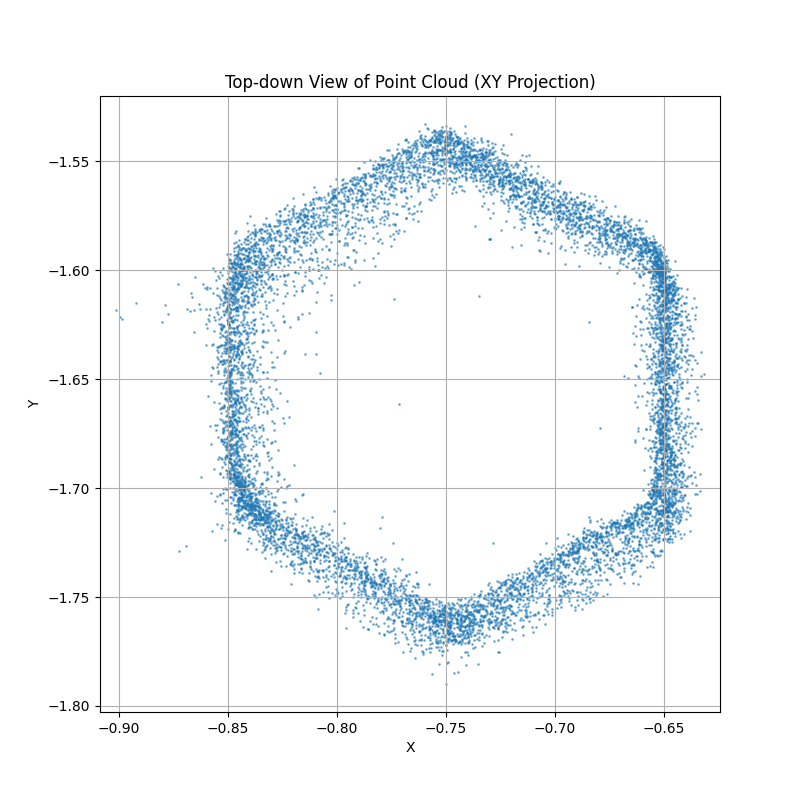

In [11]:
# Plot the top-down view
fun.plot_xy_projection(pcd_cyl)


In [13]:
cylinder_axis_pcd, cylinder_center_pcd = fun.find_cylinder_axis_and_center_pcd(pcd_cyl, visualization=False)

print("Cylinder axis direction:", cylinder_axis_pcd)
print("Cylinder center:", cylinder_center_pcd)


Cylinder axis direction: [ 7.70987599e-04 -2.10974471e-03 -9.99997477e-01]
Cylinder center: [-0.74414489 -1.65408988  9.10417972]


In [122]:
cylinder_axis_pcd_top, cylinder_center_pcd_top = fun.find_cylinder_axis_and_center_pcd(pcd_cyl_top, visualization=True)

print("Cylinder axis direction:", cylinder_axis_pcd_top)
print("Cylinder center:", cylinder_center_pcd_top)
np.save('hex_analysis/cylinder_axis_top.npy', cylinder_axis_pcd_top)
np.save('hex_analysis/cylinder_center_top.npy', cylinder_center_pcd_top)

Cylinder axis direction: [ 3.92617147e-04 -2.17167973e-03 -9.99997565e-01]
Cylinder center: [-0.74522168 -1.65068189 10.61910695]


In [126]:
cylinder_axis_pcd_bottom, cylinder_center_pcd_bottom = fun.find_cylinder_axis_and_center_pcd(pcd_cyl_bottom, visualization=True)

print("Cylinder axis direction:", cylinder_axis_pcd_bottom)
print("Cylinder center:", cylinder_center_pcd_bottom)
np.save('hex_analysis/cylinder_axis_bottom.npy', cylinder_axis_pcd_bottom)
np.save('hex_analysis/cylinder_center_bottom.npy', cylinder_center_pcd_bottom)

Cylinder axis direction: [ 0.00149735 -0.00103427 -0.99999834]
Cylinder center: [-0.74240596 -1.65953351  6.78843052]


In [19]:
# Example Usage:
plane_point = np.array([0, 0, 0])   # Plane passes through the origin
projected_pcd = fun.project_pcd_onto_plane(pcd_cyl, cylinder_axis_pcd, plane_point)
o3d.visualization.draw_geometries([projected_pcd])

In [23]:
plane_point = np.array([0, 0, 0])   # Plane passes through the origin
projected_points = fun.project_points_onto_plane(pcd_cyl, cylinder_axis_pcd, plane_point)

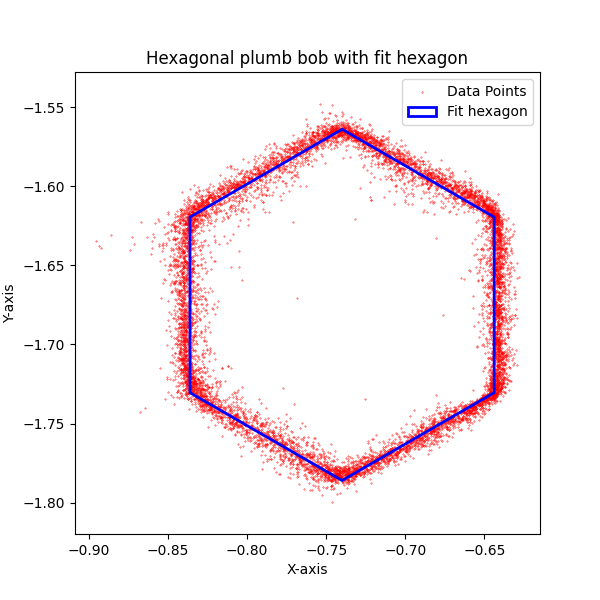

In [113]:
# Hexagon parameters
center = np.array([-0.74, -1.675])  # Center of the hexagon
radius = 0.111  # Radius of the hexagon
angle = np.pi / 6  # Rotation angle (optional)

# Get hexagon vertices
vertices = fun.hexagon_vertices_2D(center, radius, angle)

# Create a plot
plt.figure(figsize=(6,6))
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='red', s=0.1, label="Data Points")
hexagon = plt.Polygon(vertices, closed=True, edgecolor='blue', fill=None, linewidth=2, label="Fit hexagon")
plt.gca().add_patch(hexagon)

plt.axis('equal')

# Add labels and legend
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Hexagonal plumb bob with fit hexagon")
plt.legend()

# Show the plot
plt.show()


In [116]:
vertices
np.save('hex_analysis/2D_vertices.npy',vertices)

In [37]:

# Function to compute the perpendicular distance from a point to a line segment
def point_to_segment_distance(p, v1, v2):
    # Vector from v1 to v2
    line_vec = v2 - v1
    # Vector from v1 to point p
    point_vec = p - v1
    # Project point_vec onto line_vec to get the projection scalar
    line_len_sq = np.dot(line_vec, line_vec)
    if line_len_sq == 0:  # avoid division by zero, in case v1 == v2 (shouldn't happen for hexagon)
        return np.linalg.norm(p - v1)
    proj = np.dot(point_vec, line_vec) / line_len_sq
    # Clamping the projection to the segment
    proj = np.clip(proj, 0, 1)
    # Find the closest point on the line segment
    closest_point = v1 + proj * line_vec
    # Return the distance from p to the closest point
    return np.linalg.norm(p - closest_point)

# Function to check if the point is inside the hexagon (using the cross product)
def is_inside_hexagon(point, hexagon_vertices):
    n = len(hexagon_vertices)
    inside = True
    for i in range(n):
        v1 = hexagon_vertices[i]
        v2 = hexagon_vertices[(i + 1) % n]
        # Compute the cross product to determine the side of the line
        cross_product = (v2[0] - v1[0]) * (point[1] - v1[1]) - (v2[1] - v1[1]) * (point[0] - v1[0])
        # If the cross product is negative, the point is outside the hexagon
        if cross_product < 0:
            inside = False
            break
    return inside

# Function to compute the minimum distance from a point to the hexagon edges
def distance_to_hexagon_edges(point, hexagon_vertices):
    min_dist = float('inf')  # Start with an infinitely large distance
    n = len(hexagon_vertices)
    # Check distances to all edges (line segments between consecutive vertices)
    for i in range(n):
        v1 = hexagon_vertices[i]
        v2 = hexagon_vertices[(i + 1) % n]  # Next vertex, wrap around with modulus
        # Calculate the distance from the point to this edge
        dist = point_to_segment_distance(point, v1, v2)
        min_dist = min(min_dist, dist)
    return min_dist

# Function to compute the signed distance to the hexagon edges
def signed_distance_to_hexagon(point, hexagon_vertices):
    # First calculate the minimum distance to any edge
    min_dist = distance_to_hexagon_edges(point, hexagon_vertices)
    # Check if the point is inside the hexagon
    inside = is_inside_hexagon(point, hexagon_vertices)
    # If inside, return negative distance, otherwise positive
    if inside:
        return -min_dist
    else:
        return min_dist


# Get hexagon vertices
vertices = hexagon_vertices(center, radius, angle)

# Calculate signed distance from each point to the nearest edge of the hexagon
signed_distances = [signed_distance_to_hexagon(point, vertices) for point in projected_points]

# Print signed distances
for i, dist in enumerate(signed_distances):
    print(f"Signed distance from point {points[i]} to nearest hexagon edge: {dist}")


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Signed distance from point [-0.70247677 -1.75275042] to nearest hexagon edge: -0.010899393000422294
Signed distance from point [-0.74372639 -1.77813746] to nearest hexagon edge: -0.005811984898920719
Signed distance from point [-0.72576165 -1.7719754 ] to nearest hexagon edge: -0.005892507268424394
Signed distance from point [-0.70407407 -1.7680383 ] to nearest hexagon edge: 0.0015416511701112218
Signed distance from point [-0.6848762  -1.74732897] to nearest hexagon edge: -0.006794221515143381
Signed distance from point [-0.70151318 -1.76915666] to nearest hexagon edge: 0.003790627525978541
Signed distance from point [-0.70863085 -1.77119851] to nearest hexagon edge: 0.0020000824769831754
Signed distance from point [-0.70832103 -1.77129886] to nearest hexagon edge: 0.0022418971975766283
Signed distance from point [-0.72278146 -1.77186366] to nearest hexagon edge: -0.004499185864247769
Signed distance from point [-0.70642711 -1.76469756] to nearest hexagon edge: -0.002528034765549545
S

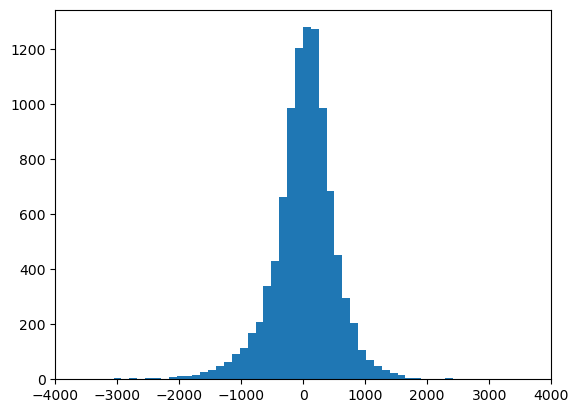

In [41]:
filtered_signed_distances = [d for d in signed_distances if d<=0.03]
plt.figure()
# plt.hist(filtered_signed_distances, bins=100)
plt.hist(distances*1e6/10, bins=100)
plt.xlim(-4000,4000)
plt.show()

In [38]:
distances = np.array(signed_distances)

In [39]:
distances


array([-0.0107771 ,  0.0006054 , -0.00139038, ...,  0.00472177,
        0.00254918,  0.00230493])

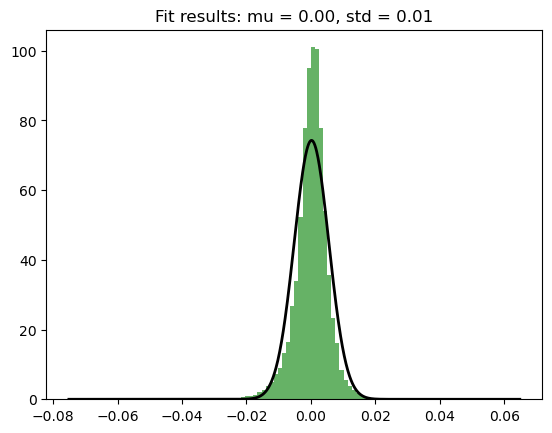

Fitted mean: 0.000193390935388246
Fitted standard deviation: 0.0053712102591539045


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample data
data = signed_distances

# Fit a Gaussian distribution to the data
mu, std = stats.norm.fit(data)

# Plot the histogram of the data
plt.hist(data, bins=100, density=True, alpha=0.6, color='g')

# Plot the PDF of the fitted Gaussian
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Display the plot
plt.title(f"Fit results: mu = {mu:.2f}, std = {std:.2f}")
plt.show()

# Optionally, return the fitted parameters (mean, std)
print(f"Fitted mean: {mu}")
print(f"Fitted standard deviation: {std}")


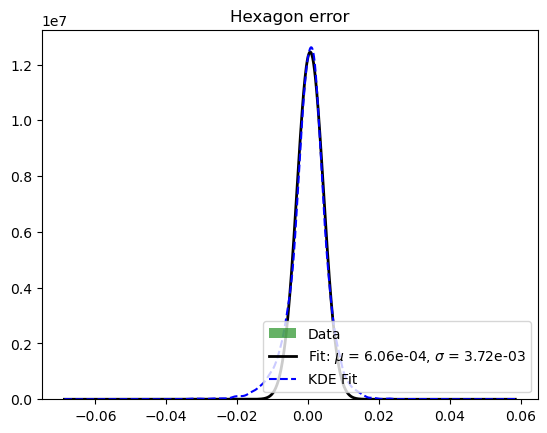

Fitted mean: 0.000605941182697166
Fitted standard deviation: 464.9814449304492 um


In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
scale_factor = 1e6/8
# Generate sample data (replace this with your actual data)
data = np.array(signed_distances, dtype=float)

# 1. Better Initial Guess
mean_guess = np.mean(data)  # Mean of the data
std_guess = np.std(data)    # Standard deviation of the data
amplitude_guess = len(data) / (std_guess * np.sqrt(2 * np.pi))  # Rough estimate of amplitude

# 2. Define Gaussian Function
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 3. Create a histogram of the data (adjust bins if necessary)
bins = 100  # You can adjust this to try different bin sizes
hist, bin_edges = np.histogram(data, bins=bins, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 4. Fit the Gaussian using curve_fit with the improved initial guess
params, covariance = curve_fit(gaussian, bin_centers, hist, p0=[mean_guess, std_guess, amplitude_guess])

# 5. Plotting the result
plt.hist(data, bins=bins, density=True, alpha=0.6, color='g', label="Data")

# Plot the fitted Gaussian
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, gaussian(x, *params)*scale_factor, 'k', linewidth=2, label=f"Fit: $\\mu$ = {params[0]:.2e}, $\\sigma$ = {params[1]:.2e}")

# Optionally, add a KDE fit for comparison
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
plt.plot(x, kde(x)*scale_factor, 'b--', label='KDE Fit')

# Display the plot with labels
plt.legend(loc='lower right')
plt.title("Hexagon error")
plt.show()

# Print the fitted parameters
print(f"Fitted mean: {params[0]}")
print(f"Fitted standard deviation: {params[1]*scale_factor} um")


In [ ]:
import numpy as np
from scipy.stats import chisquare

# Observed data (distances to the edges of the hexagon)
observed_data = np.array([5.1, 5.2, 5.3, 5.0, 4.9])  # Example data
# Model predictions (calculated from your hexagonal model)
model_data = np.array([5.0, 5.0, 5.0, 5.0, 5.0])  # Example model

# Standard deviations or uncertainties for each observed value
# For simplicity, let's assume uniform uncertainty
uncertainties = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

# Chi-squared calculation
chi_squared = np.sum((observed_data - model_data) ** 2 / uncertainties ** 2)

# Degrees of freedom: number of data points - number of parameters in the model
degrees_of_freedom = len(observed_data) - 1  # Assuming 1 parameter model

# p-value calculation using the chi-squared distribution
from scipy.stats import chi2
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

# Output results
print(f"Chi-squared: {chi_squared}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"p-value: {p_value}")

# If the p-value is very small (e.g., < 0.05), your model does not fit the data well


In [80]:
projected_points

array([[-0.8112547 , -1.73341676,  0.00303161],
       [-0.83760024, -1.72700561,  0.00299777],
       [-0.83560446, -1.72958948,  0.00300476],
       ...,
       [-0.84171661, -1.6622273 ,  0.00285793],
       [-0.79101827, -1.76048813,  0.00310432],
       [-0.77947614, -1.76686995,  0.00312669]])

In [142]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import chi2

# Generate the hexagon vertices
axis_direction = cylinder_axis_pcd
center = cylinder_center_pcd
hexagon_vertices_data = hexagon_vertices(center, radius, angle, axis_direction)

# Model: Calculate distance from each data point to the nearest edge of the hexagon
distances_model = [distance_to_hexagon_edges(point, hexagon_vertices_data) for point in points]

# Let's assume you have observed uncertainties for your points, or set them manually
# For simplicity, using a constant uncertainty for all data points
uncertainties = np.array(signed_distances)

# Observed distances (assuming you already have these from your data)
observed_distances = np.array([distance_to_hexagon_edges(point, hexagon_vertices_data) for point in points])

# Chi-squared calculation
chi_squared = np.sum((observed_distances - distances_model) ** 2 / uncertainties ** 2)

# Degrees of freedom: number of data points - number of parameters in the model
# In this case, the model has no free parameters because you're just comparing observed to modeled distances
degrees_of_freedom = len(points) - 1  # Assuming 1 parameter model (if multiple parameters, adjust accordingly)

# p-value calculation using the chi-squared distribution
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

# Output results
print(f"Chi-squared: {chi_squared:.3e}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"p-value: {p_value:.3e}")



TypeError: hexagon_vertices() takes from 2 to 3 positional arguments but 4 were given

In [ ]:
np.std(observed_distances) * np.ones_like(observed_distances)

In [94]:
len(distances_model)

891486

In [98]:
len(points[:,0])

891486

In [107]:
np.std(points[:,0])

16.421592045187932

In [147]:
signed_distances

[-0.010777097646466468,
 0.0006053971378748857,
 -0.001390380902842936,
 0.0013743590880640477,
 0.005949308155642097,
 0.008255410891507053,
 0.00477586063626545,
 0.008490605195742407,
 0.009456091670000055,
 -0.004972954354549697,
 -0.002089537809634945,
 0.005845678567300561,
 0.004515624173648591,
 0.005676204098485571,
 0.003428475237544193,
 0.0035759488189831545,
 0.0025401598537594383,
 0.0030633535937091283,
 0.007540993211988423,
 -0.0031431403350546676,
 -0.003206254998667446,
 -0.0005558668824527935,
 -0.00016154804732260164,
 0.0028625255503229984,
 0.00473799905515726,
 0.0051031306037536694,
 0.003979195784251988,
 -0.007972009464328522,
 -0.009546798347156327,
 -0.006373644535448975,
 0.005870339959250792,
 0.001091833253809793,
 -0.0010254314618207746,
 -0.0018777404814939468,
 -0.012119607900699467,
 -0.0009858742665065493,
 -0.0037008634226385613,
 0.004564878397721239,
 0.0009755828051276616,
 0.0008560897967146905,
 -0.005832232583461661,
 0.0001732174962055799,
 

In [148]:
sigma = np.std(signed_distances)

In [149]:
chi_squared = np.sum((signed_distances/sigma)**2)

# Degrees of freedom (assuming no model fitting)
dof = len(points)  

# Compute p-value
p_value = 1 - chi2.cdf(chi_squared, dof)

# Output results
print(f"Chi-squared: {chi_squared:.3e}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value:.3e}")

Chi-squared: 9.960e+03
Degrees of freedom: 9947
p-value: 4.617e-01


In [150]:
hexagon_vertices_data

array([[-0.64801607, -1.59858988,  9.10417972],
       [-0.74414489, -1.54308988,  9.10417972],
       [-0.84027371, -1.59858988,  9.10417972],
       [-0.84027371, -1.70958988,  9.10417972],
       [-0.74414489, -1.76508988,  9.10417972],
       [-0.64801607, -1.70958988,  9.10417972]])

In [143]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import chi2

# Extract x, y coordinates (assuming points lie along z)
points_2d = points[:, :2]  # Only take x and y

# Extract hexagon vertices in 2D
hexagon_vertices_2d = hexagon_vertices_data[:, :2]  # Project hexagon to xy-plane

# Model: Calculate distance from each data point to the nearest edge of the hexagon
distances_model = [distance_to_hexagon_edges(point, hexagon_vertices_2d) for point in points_2d]

# Observed distances (assuming signed distances measure normal distances)
observed_distances = np.array([distance_to_hexagon_edges(point, hexagon_vertices_2d) for point in points_2d])

# Define uncertainties
# If signed_distances represents deviations, consider using a small constant uncertainty instead
uncertainties = np.std(distances) * np.ones_like(distances)  # Ensure uncertainties are positive
uncertainties[uncertainties == 0] = np.mean(uncertainties)  # Avoid division by zero

# Chi-squared calculation
chi_squared = np.sum((observed_distances - distances_model) ** 2 / uncertainties ** 2)

# Degrees of freedom: number of data points - 2 (x and y degrees of freedom)
degrees_of_freedom = len(points_2d) - 2  

# p-value calculation
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

# Output results
print(f"Chi-squared: {chi_squared:.3e}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"p-value: {p_value:.3e}")


Chi-squared: 0.000e+00
Degrees of freedom: 9945
p-value: 1.000e+00


In [88]:
signed_distances

[-0.010777097646466468,
 0.0006053971378748857,
 -0.001390380902842936,
 0.0013743590880640477,
 0.005949308155642097,
 0.008255410891507053,
 0.00477586063626545,
 0.008490605195742407,
 0.009456091670000055,
 -0.004972954354549697,
 -0.002089537809634945,
 0.005845678567300561,
 0.004515624173648591,
 0.005676204098485571,
 0.003428475237544193,
 0.0035759488189831545,
 0.0025401598537594383,
 0.0030633535937091283,
 0.007540993211988423,
 -0.0031431403350546676,
 -0.003206254998667446,
 -0.0005558668824527935,
 -0.00016154804732260164,
 0.0028625255503229984,
 0.00473799905515726,
 0.0051031306037536694,
 0.003979195784251988,
 -0.007972009464328522,
 -0.009546798347156327,
 -0.006373644535448975,
 0.005870339959250792,
 0.001091833253809793,
 -0.0010254314618207746,
 -0.0018777404814939468,
 -0.012119607900699467,
 -0.0009858742665065493,
 -0.0037008634226385613,
 0.004564878397721239,
 0.0009755828051276616,
 0.0008560897967146905,
 -0.005832232583461661,
 0.0001732174962055799,
 

In [23]:
points

array([[-0.8112547 , -1.73341676,  0.00303161],
       [-0.83760024, -1.72700561,  0.00299777],
       [-0.83560446, -1.72958948,  0.00300476],
       ...,
       [-0.84171661, -1.6622273 ,  0.00285793],
       [-0.79101827, -1.76048813,  0.00310432],
       [-0.77947614, -1.76686995,  0.00312669]])

In [45]:
# start here

radius = 0.111  # Radius of the hexagon
angle = np.pi / 6  # Rotation angle (optional)
# Generate 3D hexagon vertices
vertices = hexagon_vertices(cylinder_center_pcd, radius, angle, cylinder_axis_pcd)

# Print the vertices
print(vertices)


[[-0.651871   -1.69904104 14.10427273]
 [-0.65187115 -1.58804104 14.10428414]
 [-0.74799998 -1.53254116 14.10417852]
 [-0.84412866 -1.58804127 14.10406148]
 [-0.84412851 -1.69904127 14.10405006]
 [-0.74799968 -1.75454116 14.10415569]
 [-0.64416113 -1.72013849  4.10429795]
 [-0.64416127 -1.60913849  4.10430937]
 [-0.7402901  -1.5536386   4.10420374]
 [-0.83641878 -1.60913872  4.1040867 ]
 [-0.83641864 -1.72013872  4.10407529]
 [-0.74028981 -1.7756386   4.10418091]]


In [46]:
vertices_np = np.array(vertices)
vertices_np

array([[-0.651871  , -1.69904104, 14.10427273],
       [-0.65187115, -1.58804104, 14.10428414],
       [-0.74799998, -1.53254116, 14.10417852],
       [-0.84412866, -1.58804127, 14.10406148],
       [-0.84412851, -1.69904127, 14.10405006],
       [-0.74799968, -1.75454116, 14.10415569],
       [-0.64416113, -1.72013849,  4.10429795],
       [-0.64416127, -1.60913849,  4.10430937],
       [-0.7402901 , -1.5536386 ,  4.10420374],
       [-0.83641878, -1.60913872,  4.1040867 ],
       [-0.83641864, -1.72013872,  4.10407529],
       [-0.74028981, -1.7756386 ,  4.10418091]])

In [47]:

points = np.asarray(pcd_cyl.points)

In [103]:
points

array([[-0.81605441, -1.72028275,  6.22841756],
       [-0.84519173, -1.70623211,  9.84942173],
       [-0.84320924, -1.70877962,  9.86666659],
       ...,
       [-0.84918512, -1.64179033,  9.68977409],
       [-0.80098466, -1.73321592, 12.92985393],
       [-0.78744658, -1.74505948, 10.34106833]])

In [108]:
np.save("hex_analysis/points.npy", points)

In [109]:
np.save('hex_analysis/cylinder_axis.npy', cylinder_axis_pcd)
np.save('hex_analysis/cylinder_center.npy', cylinder_center_pcd)

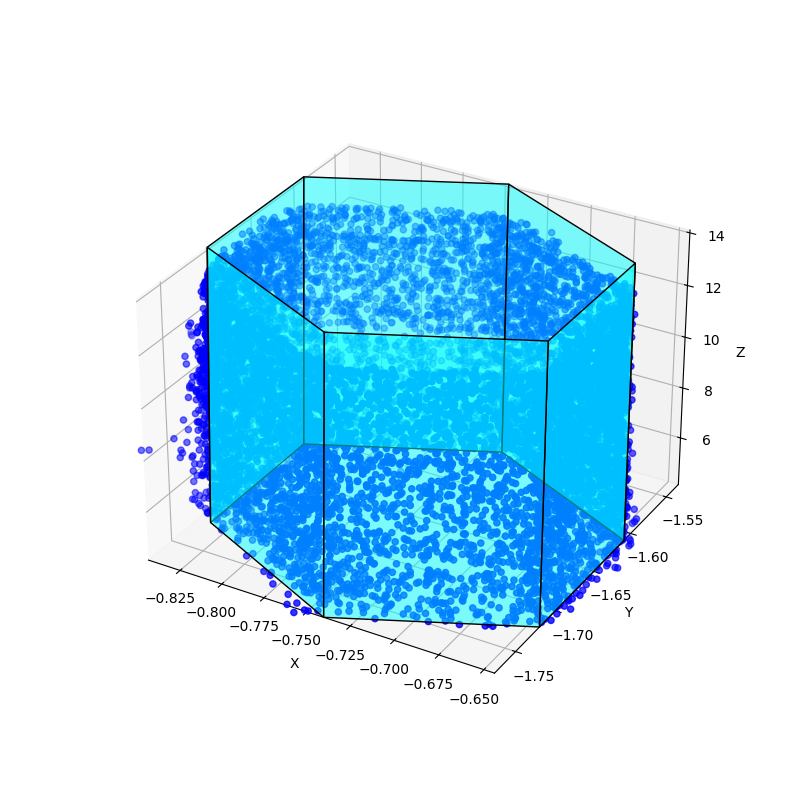

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the faces of the hexagonal prism
faces = [
    # [vertices_np[i] for i in [0, 1, 2, 3, 4, 5]],  # Top hexagon
    # [vertices_np[i] for i in [6, 7, 8, 9, 10, 11]],  # Bottom hexagon
    [vertices_np[i] for i in [0, 1, 7, 6]],  # Side faces
    [vertices_np[i] for i in [1, 2, 8, 7]],
    [vertices_np[i] for i in [2, 3, 9, 8]],
    [vertices_np[i] for i in [3, 4, 10, 9]],
    [vertices_np[i] for i in [4, 5, 11, 10]],
    [vertices_np[i] for i in [5, 0, 6, 11]]
]

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the faces
ax.add_collection3d(Poly3DCollection(faces, facecolor='cyan', edgecolor='k', alpha=0.5))
# Scatter plot for the data points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', marker='o', label='Data Points')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits based on vertices
ax.set_xlim(np.min(vertices[:, 0]), np.max(vertices[:, 0]))
ax.set_ylim(np.min(vertices[:, 1]), np.max(vertices[:, 1]))
ax.set_zlim(np.min(vertices[:, 2]), np.max(vertices[:, 2]))

# Show the plot
plt.show()


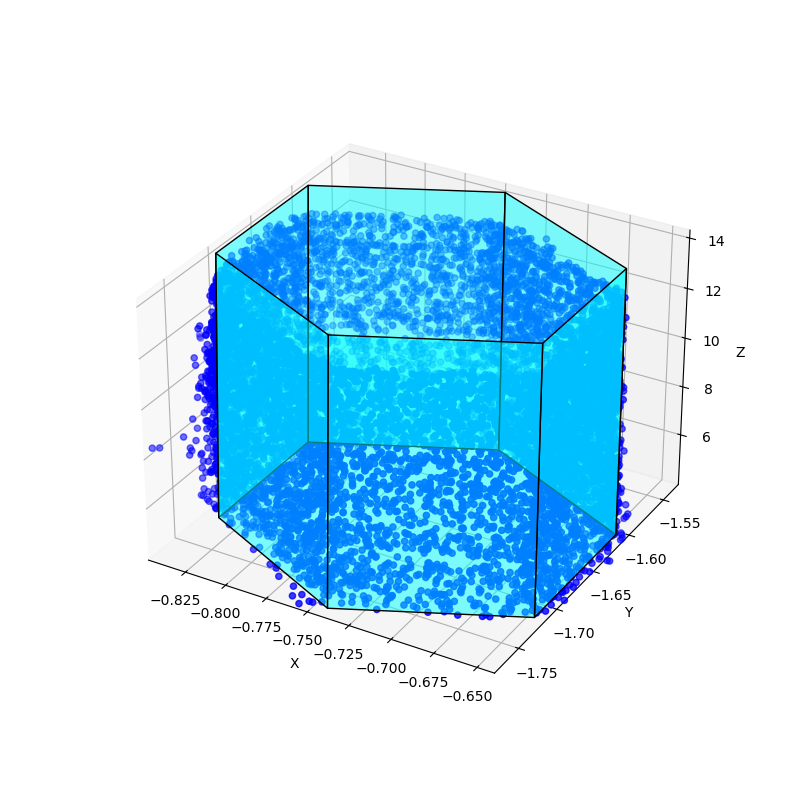

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the faces of the hexagonal prism
faces = [
    # [vertices_np[i] for i in [0, 1, 2, 3, 4, 5]],  # Top hexagon
    # [vertices_np[i] for i in [6, 7, 8, 9, 10, 11]],  # Bottom hexagon
    [vertices_np[i] for i in [0, 1, 7, 6]],  # Side faces
    [vertices_np[i] for i in [1, 2, 8, 7]],
    [vertices_np[i] for i in [2, 3, 9, 8]],
    [vertices_np[i] for i in [3, 4, 10, 9]],
    [vertices_np[i] for i in [4, 5, 11, 10]],
    [vertices_np[i] for i in [5, 0, 6, 11]]
]

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the faces
ax.add_collection3d(Poly3DCollection(faces, facecolor='cyan', edgecolor='k', alpha=0.5))
# Scatter plot for the data points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', marker='o', label='Data Points')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits based on vertices
ax.set_xlim(np.min(vertices[:, 0]), np.max(vertices[:, 0]))
ax.set_ylim(np.min(vertices[:, 1]), np.max(vertices[:, 1]))
ax.set_zlim(np.min(vertices[:, 2]), np.max(vertices[:, 2]))

# Show the plot
plt.show()


In [17]:
def point_to_line_distance(point, line_start, line_end):
    """
    Compute the shortest distance between a 3D point and a line segment.

    Parameters:
    point (array-like): Coordinates of the point (x, y, z).
    line_start (array-like): Coordinates of one point on the line (x, y, z).
    line_end (array-like): Coordinates of another point on the line (x, y, z).

    Returns:
    float: Perpendicular distance from the point to the line.
    """
    point, line_start, line_end = map(np.asarray, (point, line_start, line_end))
    
    # Compute vector projections
    line_vec = line_end - line_start
    point_vec = point - line_start
    line_length = np.linalg.norm(line_vec)

    # Projection scalar (clamped between 0 and 1 to stay within segment bounds)
    t = np.dot(point_vec, line_vec) / (line_length ** 2)
    t = np.clip(t, 0, 1)

    # Closest point on the line to the given point
    closest_point = line_start + t * line_vec
    
    # Euclidean distance
    return distance.euclidean(point, closest_point)


In [29]:
# Debugging: Print the shape of the vertices array and the Z-values
print(f"Vertices shape: {vertices.shape}")
print(f"Z-values: {vertices[:, 2]}")
print(f"Z-range: {min(vertices[:, 2])} to {max(vertices[:, 2])}")

Vertices shape: (12, 3)
Z-values: [14.10427273 14.10428414 14.10417852 14.10406148 14.10405006 14.10415569
  4.10429795  4.10430937  4.10420374  4.1040867   4.10407529  4.10418091]
Z-range: 4.104075288344608 to 14.104284142489472


[-0.651871   -1.69904104 14.10427273]
[-0.65187115 -1.58804104 14.10428414]
[-0.74799998 -1.53254116 14.10417852]
[-0.84412866 -1.58804127 14.10406148]
[-0.84412851 -1.69904127 14.10405006]
[-0.74799968 -1.75454116 14.10415569]
[-0.64416113 -1.72013849  4.10429795]
[-0.64416127 -1.60913849  4.10430937]
[-0.7402901  -1.5536386   4.10420374]
[-0.83641878 -1.60913872  4.1040867 ]
[-0.83641864 -1.72013872  4.10407529]
[-0.74028981 -1.7756386   4.10418091]


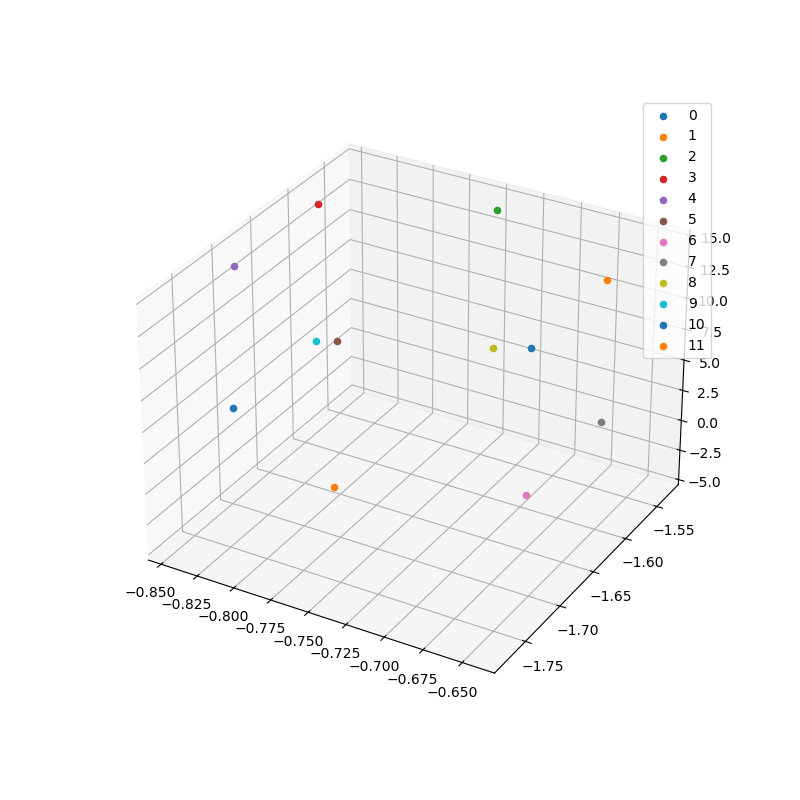

In [33]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(vertices)):
    ax.scatter(vertices[i,0], vertices[i,1], vertices[i,2], label=f'{i}')
    print(vertices[i])
plt.legend()
ax.set_zlim(-5,15)
plt.show()


In [61]:
def compute_normal_from_corners(corners):
    """
    Compute the normal vector of a plane defined by four corners.

    Args:
    - corners (np.array): A 4x3 array of points (4 corners of the plate).

    Returns:
    - np.array: The normal vector to the plane.
    """
    # Extract the points
    P1, P2, P3, P4 = corners

    # Create two vectors on the plane
    v1 = P2 - P1  # Vector from P1 to P2
    v2 = P3 - P1  # Vector from P1 to P3

    # Compute the normal vector using the cross product
    normal = np.cross(v1, v2)

    # Normalize the normal vector
    normal = normal / np.linalg.norm(normal)

    return normal

In [49]:


def point_to_plane_distance(point, plane_normal, plane_point):
    """
    Calculate the perpendicular distance from a point to a plane.

    Args:
    - point (np.array): The coordinates of the point (x0, y0, z0).
    - plane_normal (np.array): The normal vector to the plane (A, B, C).
    - plane_point (np.array): A point on the plane (x1, y1, z1).

    Returns:
    - float: The perpendicular distance from the point to the plane.
    """
    # Vector from the point on the plane to the point
    point_to_plane_vec = point - plane_point
    
    # The perpendicular distance is the projection of point_to_plane_vec onto the normal vector
    distance = np.abs(np.dot(point_to_plane_vec, plane_normal)) / np.linalg.norm(plane_normal)
    # print(f"The distance from the point to the plane is: {distance}")
    return distance

# Example usage
point = np.array([1, 2, 3])  # The point (x0, y0, z0)
plane_normal = np.array([1, -1, 1])  # The normal vector (A, B, C)
plane_point = np.array([0, 0, 0])  # A point on the plane (x1, y1, z1)

distance = point_to_plane_distance(point, plane_normal, plane_point)
print(f"The distance from the point to the plane is: {distance}")


The distance from the point to the plane is: 1.1547005383792517


In [50]:
corners = np.empty((6,4,3))
for i in range(6):
    corner1 = vertices[i%6]
    corner2 = vertices[(i+1)%6]
    corner3 = vertices[(i+6)]
    corner4 = vertices[((i + 7) - 6) % 6 + 6]
    corners[i] = [corner1, corner2, corner3, corner4]
print(corners)

[[[-0.651871   -1.69904104 14.10427273]
  [-0.65187115 -1.58804104 14.10428414]
  [-0.64416113 -1.72013849  4.10429795]
  [-0.64416127 -1.60913849  4.10430937]]

 [[-0.65187115 -1.58804104 14.10428414]
  [-0.74799998 -1.53254116 14.10417852]
  [-0.64416127 -1.60913849  4.10430937]
  [-0.7402901  -1.5536386   4.10420374]]

 [[-0.74799998 -1.53254116 14.10417852]
  [-0.84412866 -1.58804127 14.10406148]
  [-0.7402901  -1.5536386   4.10420374]
  [-0.83641878 -1.60913872  4.1040867 ]]

 [[-0.84412866 -1.58804127 14.10406148]
  [-0.84412851 -1.69904127 14.10405006]
  [-0.83641878 -1.60913872  4.1040867 ]
  [-0.83641864 -1.72013872  4.10407529]]

 [[-0.84412851 -1.69904127 14.10405006]
  [-0.74799968 -1.75454116 14.10415569]
  [-0.83641864 -1.72013872  4.10407529]
  [-0.74028981 -1.7756386   4.10418091]]

 [[-0.74799968 -1.75454116 14.10415569]
  [-0.651871   -1.69904104 14.10427273]
  [-0.74028981 -1.7756386   4.10418091]
  [-0.64416113 -1.72013849  4.10429795]]]


In [51]:
def compute_normal_from_corners(corners):
    """
    Compute the normal vector of a plane defined by four corners.
    """
    P1, P2, P3, P4 = corners

    v1 = P3 - P1  # Change order
    v2 = P4 - P1  # Use P4 instead of P2

    print("v1:", v1)
    print("v2:", v2)

    normal = np.cross(v1, v2)
    print("Cross product:", normal)

    norm_val = np.linalg.norm(normal)
    if norm_val == 0:
        print("Warning: Zero normal vector!")
        return np.array([0, 0, 0])  # Avoid division by zero

    normal = normal / norm_val
    return normal


In [52]:
normals = np.empty((6,3))
for i in range(len(corners)):
    normals[i] = compute_normal_from_corners(corners[i])
print(normals)

v1: [ 7.70987599e-03 -2.10974471e-02 -9.99997477e+00]
v2: [ 7.70972937e-03  8.99025523e-02 -9.99996336e+00]
Cross product: [1.10999695e+00 1.37820259e-06 8.55793137e-04]
v1: [ 7.70987599e-03 -2.10974471e-02 -9.99997477e+00]
v2: [ -0.08841895   0.03440244 -10.0000804 ]
Cross product: [ 0.55499967  0.96128668 -0.00160018]
v1: [ 7.70987599e-03 -2.10974471e-02 -9.99997477e+00]
v2: [ -0.08841881  -0.07659756 -10.00009181]
Cross product: [-0.55499728  0.9612853  -0.00245597]
v1: [ 7.70987599e-03 -2.10974471e-02 -9.99997477e+00]
v2: [ 7.71002261e-03 -1.32097447e-01 -9.99998619e+00]
Cross product: [-1.10999695e+00 -1.37820259e-06 -8.55793137e-04]
v1: [ 7.70987599e-03 -2.10974471e-02 -9.99997477e+00]
v2: [ 0.1038387  -0.07659733 -9.99986915]
Cross product: [-0.55499967 -0.96128668  0.00160018]
v1: [ 7.70987599e-03 -2.10974471e-02 -9.99997477e+00]
v2: [ 0.10383856  0.03440267 -9.99985773]
Cross product: [ 0.55499728 -0.9612853   0.00245597]
[[ 9.99999703e-01  1.24162700e-06  7.70986695e-04]
 [ 4

In [128]:
min_dists = []
for j in range(len(points)):
    distances = np.empty((6))
    for i in range(len(normals)):
        plane_point = vertices[i]
        # print(f'plane point = {plane_point}')
        normal = normals[i]
        # print(f'normal = {normal}')
        distance = point_to_plane_distance(points[j], normal,plane_point)
        distances[i] = distance
    # print(distances)
    min_dist = min(distances)
    min_dists.append(min_dist)
    # print(min_dist)
                
    

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

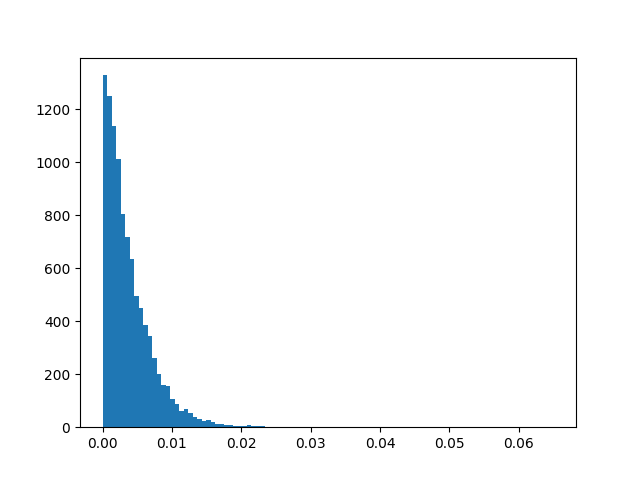

In [54]:
plt.figure()

plt.hist(min_dists, bins=100)
plt.show()

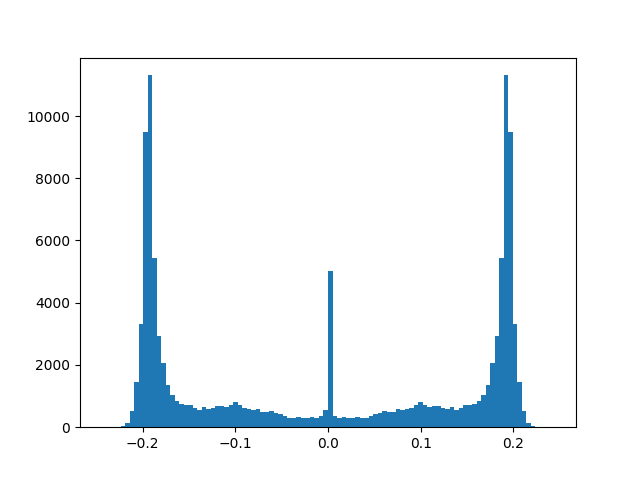

In [127]:
positive_data = np.array(min_dists)  # Only positive side
reflected_data = -positive_data  # Reflect across y-axis

full_data = np.concatenate((positive_data, reflected_data))  # Combine both sides

# std_dev_full = np.std(full_data)
# print(std_dev_full)
plt.figure()

plt.hist(full_data, bins=100)
plt.show()

In [56]:
std_dist = np.std(full_data)
print(std_dist)
std_dist_scaled = std_dist*1e5
print(std_dist_scaled)

0.005259415644985368
525.9415644985368


In [138]:
# Convert the list to a numpy array
distances_array = np.array(min_dists)

# Square each element and sum them
sum_of_squares = np.sum(distances_array**2)

print("Sum of squared distances:", sum_of_squares)
chi_squared = sum_of_squares/std_dist**2
print("chi-squared:", chi_squared)

Sum of squared distances: 0.2751484722620524
chi-squared: 9946.999999999998


In [77]:
from scipy.stats import chi2

# Degrees of freedom: 10,000 data points - 1 parameter (assuming no free parameters)
df = 9947 - 1  # Degrees of freedom

# Get p-value from chi-squared distribution
p_value = 1 - chi2.cdf(chi_squared, df)
print("P-value:", p_value)


P-value: 0.4952858854021499


In [141]:
# Compute RMSE
rmse = np.sqrt(np.mean(distances_array ** 2))

In [59]:
def rotate_planes_y(planes, theta):
    """
    Rotates an array of plane normal vectors around the Y-axis by an angle theta.
    
    Parameters:
    - planes: (N, 3) NumPy array, where each row is a normal vector [Nx, Ny, Nz].
    - theta: float, rotation angle in radians.
    
    Returns:
    - rotated_planes: (N, 3) NumPy array of rotated normal vectors.
    """
    # Define the rotation matrix around the Y-axis
    R_y = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    
    # Apply the rotation to all normal vectors
    rotated_planes = planes @ R_y.T  # Matrix multiplication with transpose of R_y
    
    return rotated_planes

In [84]:
print(normals)
# Rotation angle (e.g., 30 degrees)
theta = np.radians(0.01)

# Rotate the planes
rotated_normals = rotate_planes_y(normals, theta)

print("Rotated Planes:\n", rotated_normals)


[[ 9.99999703e-01  1.24162700e-06  7.70986695e-04]
 [ 4.99999851e-01  8.66024290e-01 -1.44160012e-03]
 [-4.99998072e-01  8.66023691e-01 -2.21258680e-03]
 [-9.99999703e-01 -1.24162699e-06 -7.70986695e-04]
 [-4.99999851e-01 -8.66024290e-01  1.44160012e-03]
 [ 4.99998072e-01 -8.66023691e-01  2.21258680e-03]]
Rotated Planes:
 [[ 9.99999822e-01  1.24162700e-06  5.96453811e-04]
 [ 4.99999592e-01  8.66024290e-01 -1.52886653e-03]
 [-4.99998450e-01  8.66023691e-01 -2.12532064e-03]
 [-9.99999822e-01 -1.24162699e-06 -5.96453811e-04]
 [-4.99999592e-01 -8.66024290e-01  1.52886653e-03]
 [ 4.99998450e-01 -8.66023691e-01  2.12532064e-03]]


In [85]:
min_dists = []
for j in range(len(points)):
    distances = np.empty((6))
    for i in range(len(rotated_normals)):
        plane_point = vertices[i]
        # print(f'plane point = {plane_point}')
        normal = rotated_normals[i]
        # print(f'normal = {normal}')
        distance = point_to_plane_distance(points[j], normal,plane_point)
        distances[i] = distance
    # print(distances)
    min_dist = min(distances)
    min_dists.append(min_dist)
    # print(min_dist)
                
    

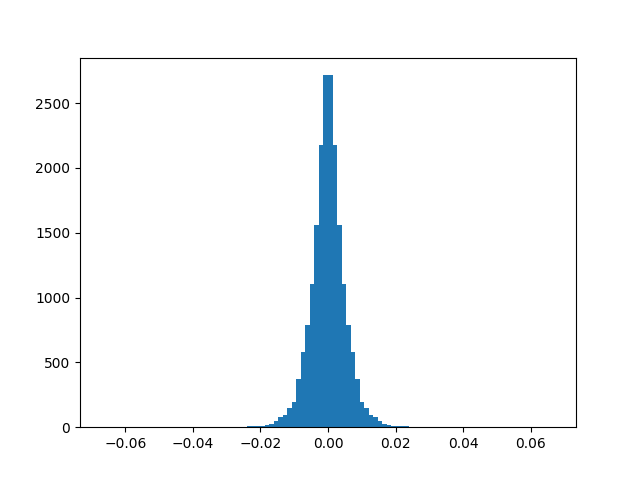

In [86]:
positive_data = np.array(min_dists)  # Only positive side
reflected_data = -positive_data  # Reflect across y-axis

full_data = np.concatenate((positive_data, reflected_data))  # Combine both sides

# std_dev_full = np.std(full_data)
# print(std_dev_full)
plt.figure()

plt.hist(full_data, bins=100)
plt.show()

In [89]:
# Convert the list to a numpy array
distances_array = np.array(min_dists)

# Square each element and sum them
sum_of_squares = np.sum(distances_array**2)
std_dist = np.std(full_data)

print("Sum of squared distances:", sum_of_squares)
chi_squared = sum_of_squares/std_dist**2
print("chi-squared:", chi_squared)
print("std:", std_dist*1e5)

# Degrees of freedom: 10,000 data points - 1 parameter (assuming no free parameters)
df = 9947 - 1  # Degrees of freedom

# Get p-value from chi-squared distribution
p_value = 1 - chi2.cdf(chi_squared, df)
print("P-value:", p_value)

Sum of squared distances: 0.26741634227439925
chi-squared: 9947.0
std: 518.4989880778742
P-value: 0.495285885402155


In [90]:
alphas = np.linspace(0, 0.1, 0.01)
std_dists = []

for i in range(len(alphas)):
    theta = np.radians(0.01*i)
    rotated_normals = rotate_planes_y(normals, theta)
    min_dists = []
    for j in range(len(points)):
        distances = np.empty((6))
        for i in range(len(rotated_normals)):
            plane_point = vertices[i]
            # print(f'plane point = {plane_point}')
            normal = rotated_normals[i]
            # print(f'normal = {normal}')
            distance = point_to_plane_distance(points[j], normal,plane_point)
            distances[i] = distance
        # print(distances)
        min_dist = min(distances)
        min_dists.append(min_dist)
        # print(min_dist)
    positive_data = np.array(min_dists)  # Only positive side
    reflected_data = -positive_data  # Reflect across y-axis
    full_data = np.concatenate((positive_data, reflected_data))  # Combine both sides
    # Convert the list to a numpy array
    distances_array = np.array(min_dists)
    
    # Square each element and sum them
    # sum_of_squares = np.sum(distances_array**2)
    std_dist = np.std(full_data)
    std_dists.append(std_dist)
    # print("Sum of squared distances:", sum_of_squares)
    # chi_squared = sum_of_squares/std_dist**2
    # # print("chi-squared:", chi_squared)
    # # print("std:", std_dist*1e5)
    
    # # Degrees of freedom: 10,000 data points - 1 parameter (assuming no free parameters)
    # df = 9947 - 1  # Degrees of freedom
    
    # # Get p-value from chi-squared distribution
    # p_value = 1 - chi2.cdf(chi_squared, df)
    # # print("P-value:", p_value)  
        

TypeError: 'float' object cannot be interpreted as an integer

In [100]:
import numpy as np

# Assuming these functions exist
def rotate_planes_y(normals, theta):
    R_y = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return normals @ R_y.T

def point_to_plane_distance(point, normal, plane_point):
    return np.dot(normal, point - plane_point) / np.linalg.norm(normal)

# Define alphas correctly
alphas = np.linspace(0, 0.1, num=11)  # 11 steps from 0 to 0.1
std_dists = []

for i in range(len(alphas)):
    theta = np.radians(alphas[i])  # Convert alpha to radians
    rotated_normals = rotate_planes_y(normals, theta)
    min_dists = []

    for j in range(len(points)):
        distances = np.zeros(6)  # Initialize array properly

        for k in range(len(rotated_normals)):  # Use 'k' instead of 'i'
            plane_point = vertices[k]
            normal = rotated_normals[k]
            distances[k] = point_to_plane_distance(points[j], normal, plane_point)

            min_dist = np.min(distances)
            min_dists.append(min_dist)

    # Process distances for std deviation
    positive_data = np.array(min_dists)
    reflected_data = -positive_data  # Reflect across y-axis
    full_data = np.concatenate((positive_data, reflected_data))  # Combine both sides
    
    # Compute standard deviation
    std_dist = np.std(full_data)*1e5
    std_dists.append(std_dist)


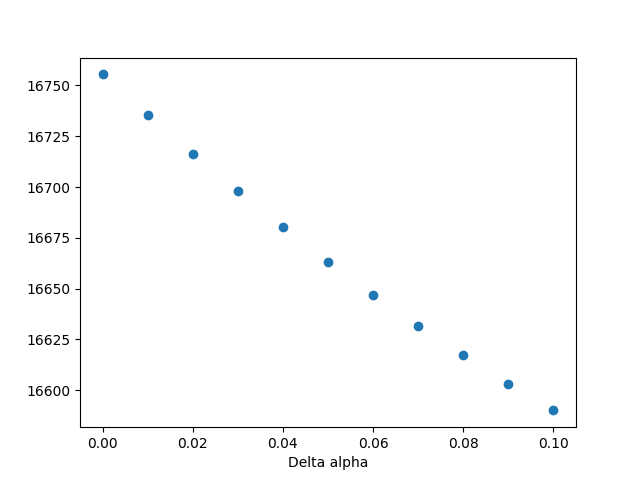

In [102]:
plt.figure()
plt.scatter(alphas, std_dists)
plt.xlabel('Delta alpha')
# plt.ylabel(
plt.show()

In [155]:
# ENDING ON THIS CELL 3/28/25
# need to fix chi-squared function to have difference between distance model and observed distances...

def rotate_axis(axis, angle, axis_of_rotation):
    """
    Rotate the axis direction by a small angle about the axis_of_rotation.
    Uses Rodrigues' rotation formula to calculate the new axis direction.
    """
    # Rodrigues' rotation formula
    axis = axis / np.linalg.norm(axis)  # Normalize the axis vector
    axis_of_rotation = axis_of_rotation / np.linalg.norm(axis_of_rotation)  # Normalize the rotation axis
    
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    
    rotated_axis = (cos_theta * axis) + (sin_theta * np.cross(axis_of_rotation, axis)) + \
                   ((1 - cos_theta) * np.dot(axis_of_rotation, axis) * axis_of_rotation)
    
    return rotated_axis

# Function to compute chi-squared for a given axis perturbation
def compute_chi_squared(axis_direction, points, vertices, uncertainties):
    # Calculate the model distances for the current axis direction
    distances_model = [distance_to_hexagon_edges(point, vertices) for point in points]
    
    # Calculate observed distances
    observed_distances = np.array([distance_to_hexagon_edges(point, vertices) for point in points])
    
    # Chi-squared calculation
    chi_squared = np.sum((observed_distances - distances_model) ** 2 / uncertainties ** 2)
    return chi_squared




In [162]:
observed_distances

array([0.00612518, 0.01374573, 0.01498554, ..., 0.0014429 , 0.01945145,
       0.01920721])

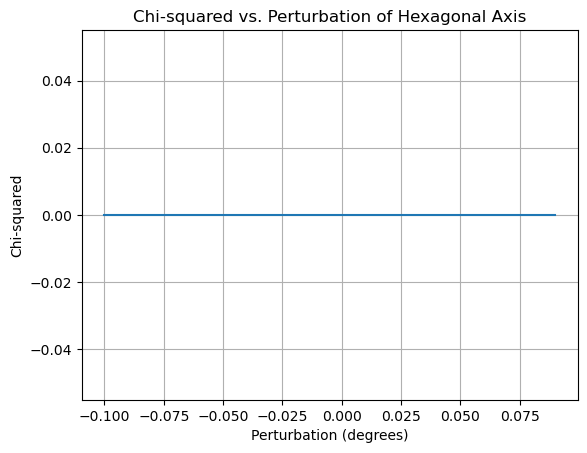

In [159]:
# Initialize the results array for chi-squared values
chi_squared_results = []

vertices = hexagon_vertices(cylinder_center_pcd, radius, angle, cylinder_axis_pcd)
# Define perturbation range (from -0.1 to 0.1 degrees, steps of 0.001 degree)
perturbation_range = np.arange(-0.1, 0.1, 0.01)  # in degrees
perturbation_range_rad = np.radians(perturbation_range)  # convert to radians

# Loop over the perturbation range, rotating the axis slightly and computing chi-squared
for perturbation in perturbation_range_rad:
    # Perturb the axis by rotating around a chosen axis (e.g., z-axis or any other axis)
    rotated_axis = rotate_axis(cylinder_axis_pcd, perturbation, np.array([0, 1, 0]))  # Rotate around z-axis
    
    # Compute chi-squared for this perturbation
    chi_squared_val = compute_chi_squared(rotated_axis, points, vertices, sigma)
    
    # Store the chi-squared result
    chi_squared_results.append(chi_squared_val)

# Plot chi-squared values against perturbation
plt.plot(perturbation_range, chi_squared_results)
plt.xlabel('Perturbation (degrees)')
plt.ylabel('Chi-squared')
plt.title('Chi-squared vs. Perturbation of Hexagonal Axis')
plt.grid(True)
plt.show()

In [160]:
chi_squared_results

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# trying again with cylinder

In [54]:
ply_file_e = "data/plumbbobv1_erin/point_cloud/Dense point cloud 1.ply" # maya's feb 2025 photos
obj_file_e = "data/plumbbobv1_erin/textured_mesh/Textured_mesh_1.obj"
mtl_file_e = "data/plumbbobv1_erin/textured_mesh/Textured_mesh_1.mtl"  # Ensure the .mtl file is correctly referenced
jpeg_file_e = "data/plumbbobv1_erin/textured_mesh/Textured_mesh_1_tex0.jpg"  # The first texture file, but Open3D will handle multiple


In [55]:
pcd_e = o3d.io.read_point_cloud(ply_file_e)

print(f"Loaded {len(pcd_e.points)} points from the PLY file")

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd_e], window_name="PLY Viewer")

# Convert to numpy array for further processing
points_e = np.asarray(pcd_e.points)
#print("First 5 points:\n", points[:5])


Loaded 1296676 points from the PLY file


In [56]:
# Define cylinder properties
cylinder_center_e = np.array([-6, 0, 13])  # Adjust based on the actual center of your cylinder
cylinder_radius_e = 9.0  # Adjust the radius
cylinder_height_e = 8.0  # Adjust the height

fun.filter_points_in_cylinder_min_max(pcd_e, np.array([0, 0, 1]), cylinder_center_e, cylinder_radius_e, 0,18)


PointCloud with 239987 points.

In [57]:


pcd_cyl_e = fun.filter_points_in_cylinder(pcd_e, np.array([0, 0, 1]), cylinder_center_e, cylinder_radius_e, cylinder_height_e)


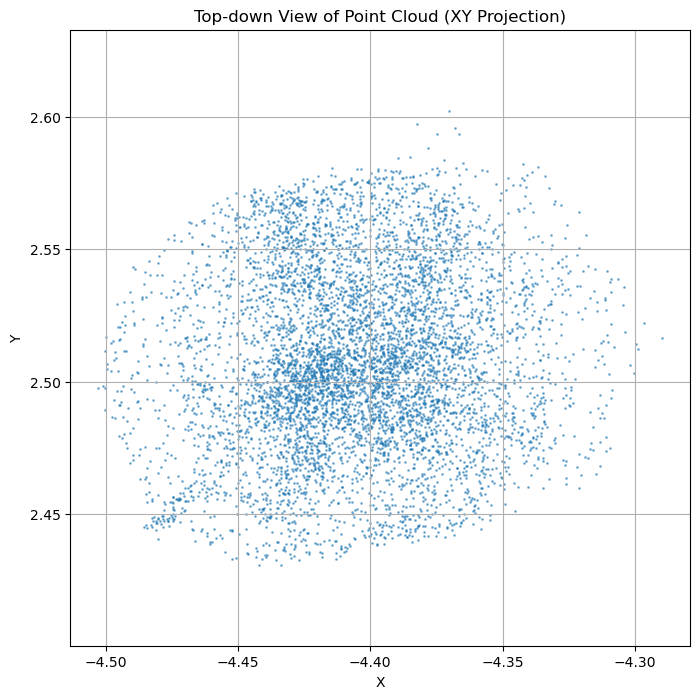

In [25]:

# Plot the top-down view
plot_xy_projection(pcd_cyl_e)


In [58]:
cylinder_axis_pcd_e, cylinder_center_pcd_e = fun.find_cylinder_axis_and_center_pcd(pcd_cyl_e)

print("Cylinder axis direction:", cylinder_axis_pcd_e)
print("Cylinder center:", cylinder_center_pcd_e)


Cylinder axis direction: [ 0.00820957  0.00177146 -0.99996473]
Cylinder center: [-4.40498346  2.50811467 13.21803414]


In [60]:
plane_point = np.array([0, 0, 0])   # Plane passes through the origin
projected_pcd_e = project_pcd_onto_plane(pcd_cyl_e, cylinder_axis_pcd_e, plane_point)
o3d.visualization.draw_geometries([projected_pcd_e])

projected_points_e = project_points_onto_plane(pcd_cyl_e, cylinder_axis_pcd_e, plane_point)

In [61]:
x_mean_e = np.mean(projected_points_e[:,0])
y_mean_e = np.mean(projected_points_e[:,1])
print(x_mean_e,y_mean_e)

-4.296212506225579 2.53158521674661


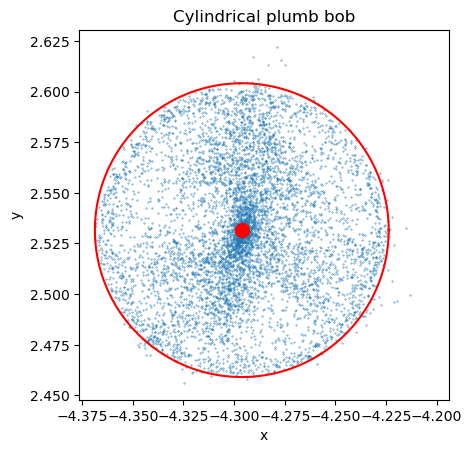

In [79]:
plt.figure()
theta = np.linspace(0, 2*np.pi, 1000)
R = 0.145/2
x0 = x_mean_e
y0 = y_mean_e
x = np.cos(theta)*R+x0
y = np.sin(theta)*R+y0
plt.plot(x,y, 'r')
plt.scatter(projected_points_e[:,0], projected_points_e[:,1], s=0.1)
plt.scatter(x_mean_e,y_mean_e, color='r', s=100)
plt.axis('square')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cylindrical plumb bob')
plt.show()

In [59]:
projected_points_e

NameError: name 'projected_points_e' is not defined